In [77]:
import pandas as pd
import scipy
import nltk
import numpy as np
import matplotlib.pyplot as plt

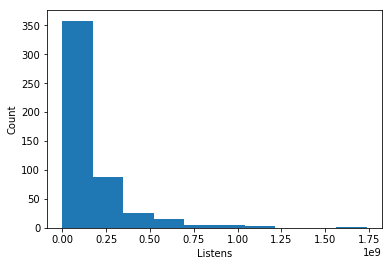

In [78]:
data = pd.read_csv('../samples/hip-hop_sample_lyrics.csv')
# plt.scatter(data['Count'], data['Diversity'])
plt.hist(data['Count'])
# plt.xlim((0, 300))
plt.xlabel('Listens')
plt.ylabel('Count')
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mac/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


([<matplotlib.axis.YTick at 0x12a7e7630>,
 <a list of 3 Text yticklabel objects>)

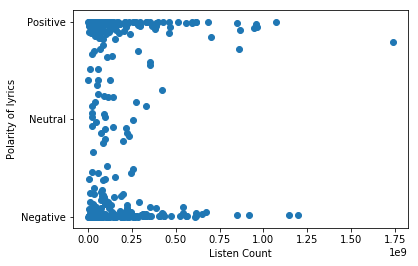

In [86]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('vader_lexicon')

SID = SentimentIntensityAnalyzer()
data['Polarity'] = data['Lyrics'].apply(lambda x: SID.polarity_scores(x)['compound'])

plt.scatter(data['Count'], data['Polarity'])
plt.xlabel('Listen Count')
plt.ylabel('Polarity of lyrics')
plt.yticks([-1, 0, 1], ['Negative', 'Neutral', 'Positive'])

In [80]:
# filtering stop words
import re
from nltk.corpus import stopwords
stopwords_eng = stopwords.words('english')

data['Lyrics'] = data['Lyrics'].apply(lambda x : x.lower())
data['Lyrics'] = data['Lyrics'].apply(lambda x : re.sub(r'\d+','', x))
data['Lyrics'] = data['Lyrics'].apply(lambda x : ' '.join([word for word in re.split(r'[\W_]' ,x) if word not in stopwords_eng]))
data['Lyrics'] = data['Lyrics'].apply(lambda x : re.sub(r"i'm",'', x))
data['Lyrics'] = data['Lyrics'].apply(lambda x : re.sub(r"you",'', x))
data['Lyrics'] = data['Lyrics'].apply(lambda x : re.sub(r"yeah",'', x))
data['Lyrics'] = data['Lyrics'].apply(lambda x : re.sub(r"oh",'', x))


Text(0.5,0,'Count of romantic words used')

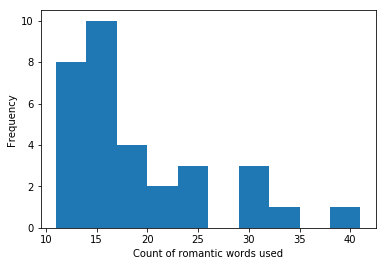

In [81]:
romantic_words = set([
    'love', 'lover', 'baby','luv', 'beautiful', 'cute', 'loving', 'gorgeous', 'fine', 'darling'
])

data['Romantic words'] = data['Lyrics'].apply(lambda x : len([word for word in re.split(r'[\W_]' ,x) if word in romantic_words]))
# plt.scatter(data['Count'], data['Romantic words'])

data['Love existence'] = data['Lyrics'].apply(lambda x : len([word for word in re.split(r'[\W_]' ,x) if word in romantic_words]) > 0)

# plt.scatter(data['Count'], data['Romantic words'], c=data['Love existence'])

data.sort_values(by='Count')

bins = [0, 5, 10, 20, 40]
labels = ['Cat{}'.format(x) for x in bins[1::]]
data['Romance category'] = pd.cut(data['Romantic words'], bins=bins, labels=labels)
data.head()  
data[data['Romantic words'] > 10]['Romantic words'].plot(kind='hist')
plt.xlabel('Count of romantic words used')



Text(0,0.5,'Love count')

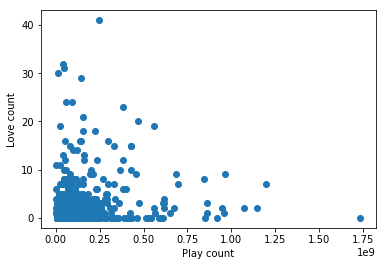

In [82]:
plt.scatter(data['Count'], data['Romantic words'])
plt.xlabel('Play count')
plt.ylabel('Love count')

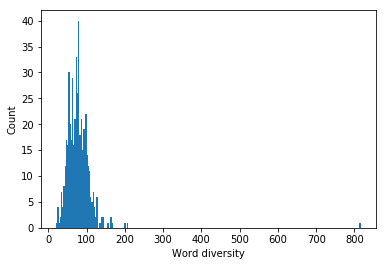

In [83]:
# Finding diversity score of lyrics with correlation of popularity
def lexical_diversity(my_text_data):
    word_count = len(my_text_data)
    vocab_size = len(set(my_text_data))
    diversity_score = word_count / vocab_size
    return diversity_score

data['Diversity'] = data['Lyrics'].apply(lambda x : lexical_diversity(x))

# plt.scatter(data['Count'], data['Diversity'])
plt.hist(data['Diversity'], bins=250)
# plt.xlim((0, 300))
plt.xlabel('Word diversity')
plt.ylabel('Count')
plt.show()